# arim, airKorea data day, hour 기준 비교
## 2개 그래프

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from matplotlib import font_manager, rc
import warnings

# plt parameter 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = [25,15]
plt.rcParams['font.size'] = 25

# 경고메세지 끄기
warnings.filterwarnings(action='ignore')

# 함수 정리본

In [72]:
# outliar 제거 함수 (IQR 설정) (1)
def remove_out(dataframe, remove_col) :
    dff = dataframe
    for k in remove_col :
        level_1q = dff[k].quantile(0.25)
        level_3q = dff[k].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 1.5
        outliar_h = dff[k] >= level_3q + (rev_range * IQR)
        outliar_l = dff[k] <= level_1q - (rev_range * IQR)
        a=dff[outliar_h].index
        b=dff[outliar_l].index
        dff.drop(a, inplace=True)
        dff.drop(b, inplace=True)
        
# 마이크로초 단위까지 나와 있는 date 컬럼 값을 Hour 단위로 바꿔주기 위한 함수 (2)
# def substract_minutes(date) :
#     delta = timedelta(hours=date.hour,minutes=date.minute,seconds=date.second,microseconds=date.microsecond)
#     return date - delta + timedelta(days=0, hours=date.hour)
# groupby 함수 사용으로 필요가 없어짐

# pm25값이 최대인 인덱스를 찾아 빼는 함수, 2번 함수가 잘 적용되는지 확인하기 위한 용도
def find_max_value_pm25(data1, data2) :
    max_index = data1['pm25'].idxmax()
    arim = data1.loc[max_index, 'pm25'] # data1의 max값의 날짜에 맞는 pm25값
    arim_date = max_index # max_index값이 날짜로 설정되어 있으므로
    air = data2.loc[data2.index == arim_date] # data1와 같은 날짜 찾기
    return abs(air.pm25 - arim) # arim data와 air data의 pm25[max]값 차이

# pm10값이 최대인 인덱스를 찾아 빼는 함수, 2번 함수가 잘 적용되는지 확인하기 위한 용도
def find_max_value_pm10(data1, data2) :
    max_index = data1['pm10'].idxmax()
    arim = data1.loc[max_index, 'pm10'] # data1의 max값의 날짜에 맞는 pm25값
    arim_date = max_index # max_index값이 날짜로 설정되어 있으므로
    air = data2.loc[data2.index == arim_date] # data1와 같은 날짜 찾기
    return abs(air.pm10 - arim) # arim data와 air data의 pm25[max]값 차이


#그래프 2개 비교 (차이 비교)
def difference(dataframe1, dataframe2) :    
    diff = abs(np.subtract(dataframe1,dataframe2))
    # 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정

    plt.plot(dataframe1.index,diff)
    for i in range(len(dataframe1.index)):
        height = diff[i]
        plt.text(dataframe1.index[i], height + 0.01, '%.2f' %height, ha='center', va='bottom', size = 25)
    plt.title("Difference between airm-airKorea")
    plt.xlabel("Hour")
    plt.ylabel("diff")
    plt.show()


# 오차 구해서 그래프로 (dataframe1과 dataframe2는 범위를 설정해야함) dataframe1 = airKorea, dataframe2 = arim (4)
def errorRate(dataframe1, dataframe2) :
    diff = abs(np.subtract(dataframe1, dataframe2))
    result = (diff/dataframe1)*100
    result = result.to_frame(name='errorRate') # series type인 result를 dataframe으로 변환한 후, errorRate 열 추가
    
    # errorRate가 100 이상인 index를 추출하여 호출
    if any(result['errorRate'] >= 100) :
        errorRate100 = result[result['errorRate'] >= 100]['errorRate']
        print(errorRate100)
        print('##########arimData##########')
        print(arim_data_avg.loc[errorRate100.index.tolist()])
        print('##########airKorea Data##########')
        print(airKorea_data_avg.loc[errorRate100.index.tolist()])
    
    plt.plot(dataframe1.index,result['errorRate'])
    for i in range(len(dataframe1.index)):
        height = result.iloc[i]['errorRate']
        plt.text(dataframe1.index[i], height + 0.01, '%.2f %%' %height, ha='center', va='bottom', size = 25)
    plt.title("error rate between airKorea-arim")
    plt.xlabel("Hour")
    plt.ylabel("error rate(%)")
    plt.ylim([0,100])
    plt.show()

In [4]:
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
matching = [s for s in font_list if 'Gothic' in s]
print(matching)

['Yu Gothic', 'Century Gothic', 'Hancom Gothic', 'Yu Gothic', 'Hancom Gothic', 'HYGothic-Medium', 'Malgun Gothic', 'Franklin Gothic Medium', 'Malgun Gothic', 'Century Gothic', 'Yu Gothic', 'Hancom Gothic', 'Century Gothic', 'Century Gothic', 'Franklin Gothic Medium', 'MS Gothic', 'Yu Gothic', 'Yu Gothic', 'Century Gothic', 'Hancom Gothic', 'MS Gothic', 'HYGothic-Extra', 'HYGothic-Extra', 'Yu Gothic', 'Franklin Gothic Medium', 'Malgun Gothic', 'Century Gothic', 'Malgun Gothic', 'Century Gothic', 'Century Gothic', 'Malgun Gothic', 'HYGothic-Medium', 'Franklin Gothic Medium', 'Yu Gothic', 'Malgun Gothic', 'Yu Gothic']


# Arim_Data 1월1일 ~ 2월 28일까지 Day 기준

In [ ]:
# arim_data 03.25 Hour
arim_data = pd.read_csv('./OA200_3/OA2003_03.25.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)


# airKorea_data 03.25 Hour
airKorea_data = pd.read_csv('./AirKorea_대안동/AirKorea_03.25.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()


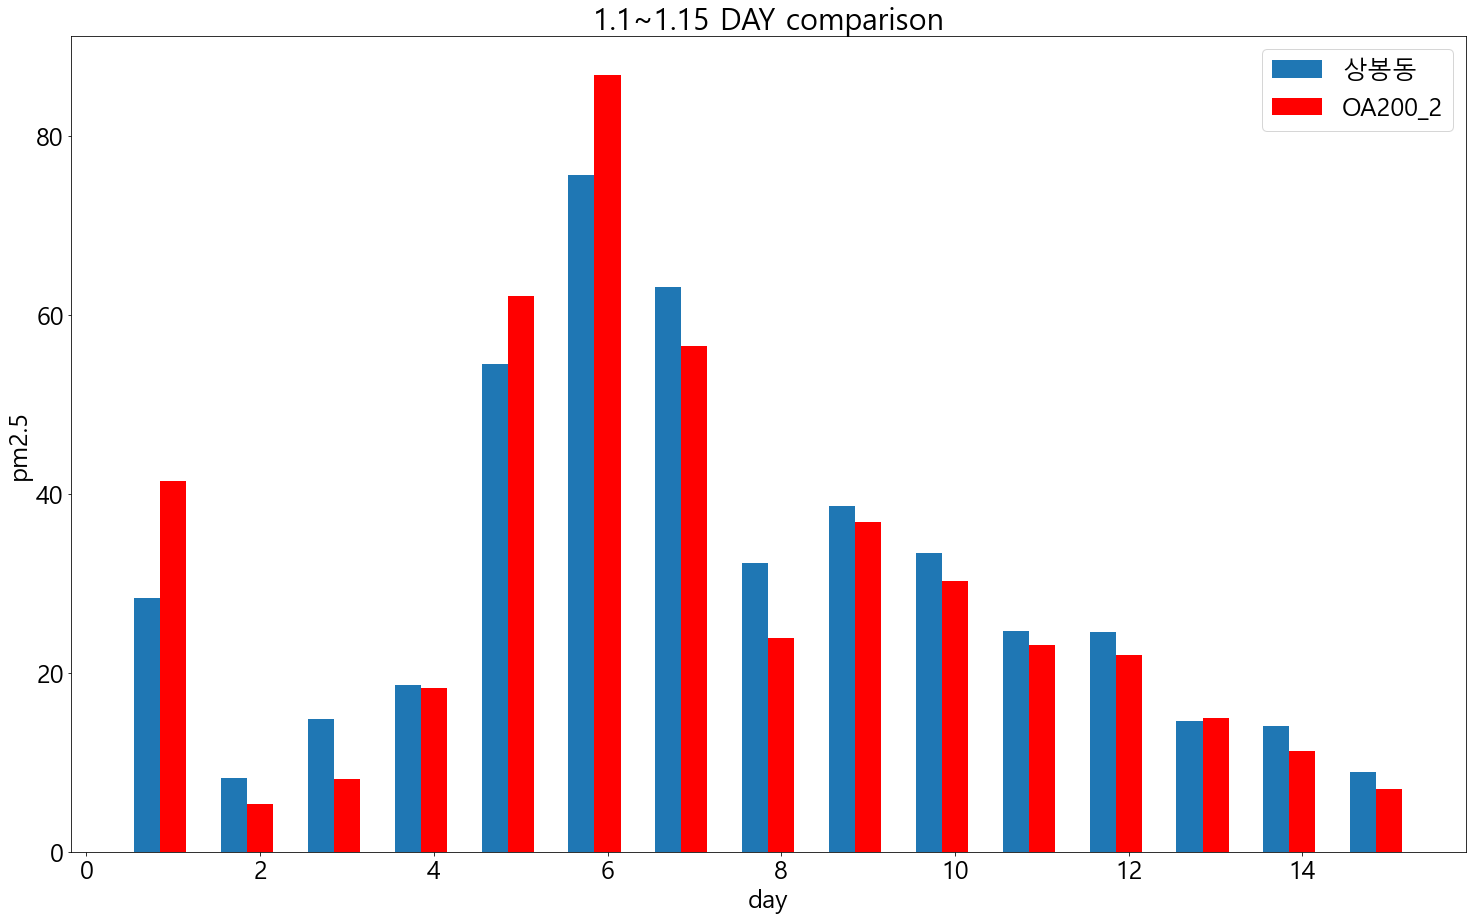

In [73]:
# arim_data 1.1~1.15 Day
arim_data = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data['day'] = arim_data.reg_date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
arim_data_avg = arim_data.groupby('day').mean()

# airKorea_data 1.1~1.15
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data['day'] = airKorea_data.date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
airKorea_data_avg = airKorea_data.groupby('day').mean()


# 그래프 2개 비교 ( 위는 선그래프, 아래는 막대 그래프 )
"""
plt.plot(airKorea_data.day, airKorea_data.pm25, arim_data.day, arim_data.pm25, 'r-')
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.1~1.15 DAY comparison')
plt.show()
"""

bar_width = 0.3
plt.bar(airKorea_data_avg.index-bar_width, airKorea_data_avg.pm25, label='상봉동', width=bar_width)
plt.bar(arim_data_avg.index, arim_data_avg.pm25, color='red', label='OA200_2', width=bar_width)
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend()
plt.title('1.1~1.15 DAY comparison')
plt.show()

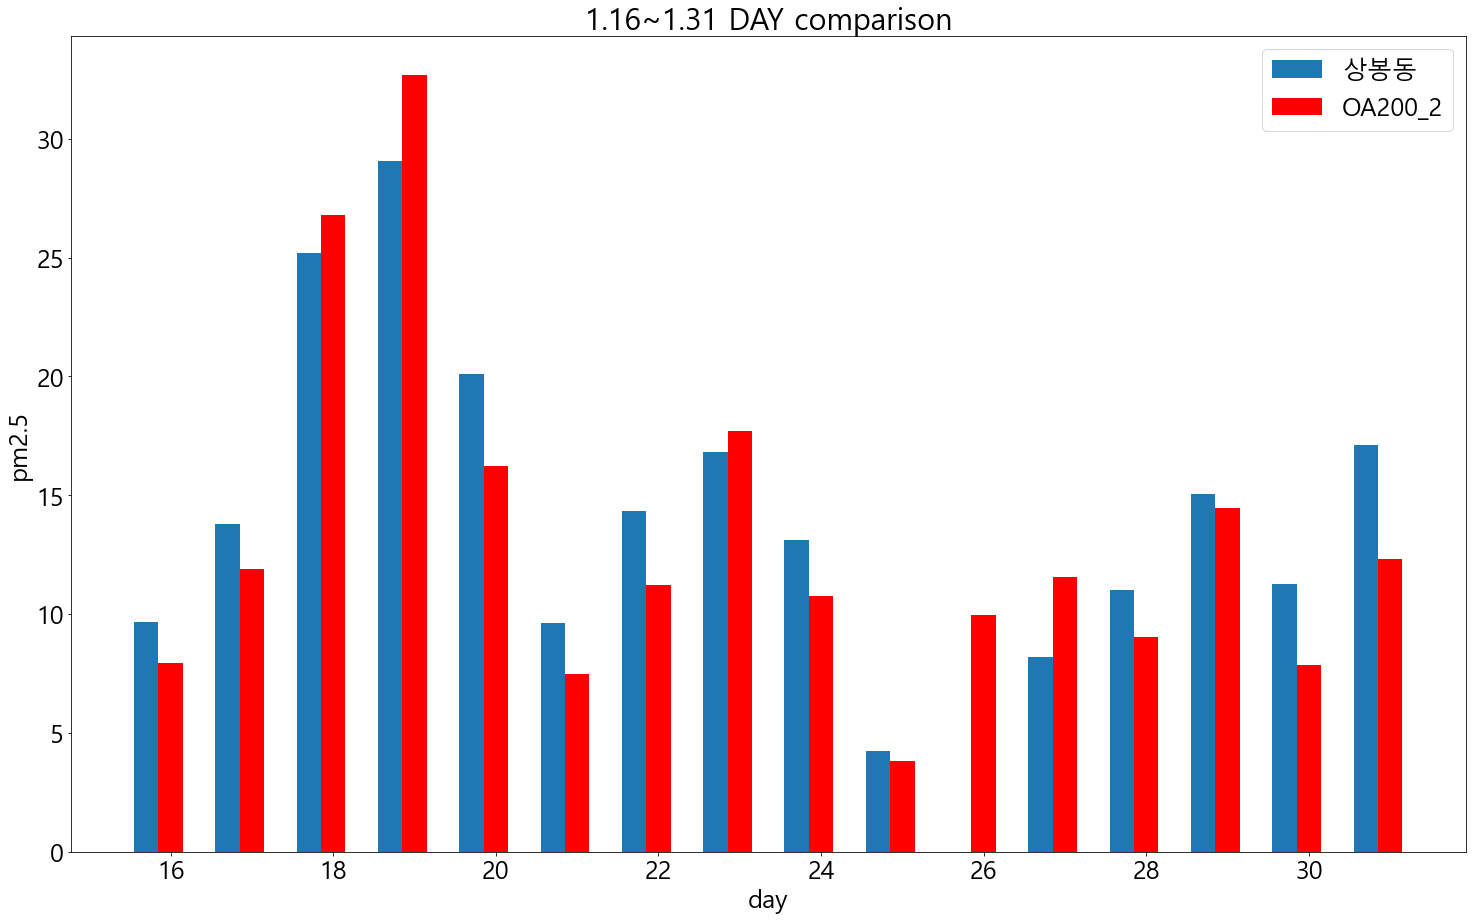

In [7]:
# arim_data 1.16~1.31 Day
arim_data = pd.read_csv('./OA200_2/OA2002_01.16~01.31.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data['day'] = arim_data.reg_date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
arim_data_avg = arim_data.groupby('day').mean()



# airKorea_data 1.16~1.31
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.16~01.31.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data['day'] = airKorea_data.date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
airKorea_data_avg = airKorea_data.groupby('day').mean()



# 그래프 2개 비교 ( 위는 선그래프, 아래는 막대 그래프 )
"""
plt.plot(airKorea_data.day, airKorea_data.pm25, arim_data.day, arim_data.pm25, 'r-')
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.1~1.15 DAY comparison')
plt.show()
"""

bar_width = 0.3
plt.bar(airKorea_data_avg.index-bar_width, airKorea_data_avg.pm25, label='상봉동', width=bar_width)
plt.bar(arim_data_avg.index, arim_data_avg.pm25, color='red', label='OA200_2', width=bar_width)
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend()
plt.title('1.16~1.31 DAY comparison')
plt.show()

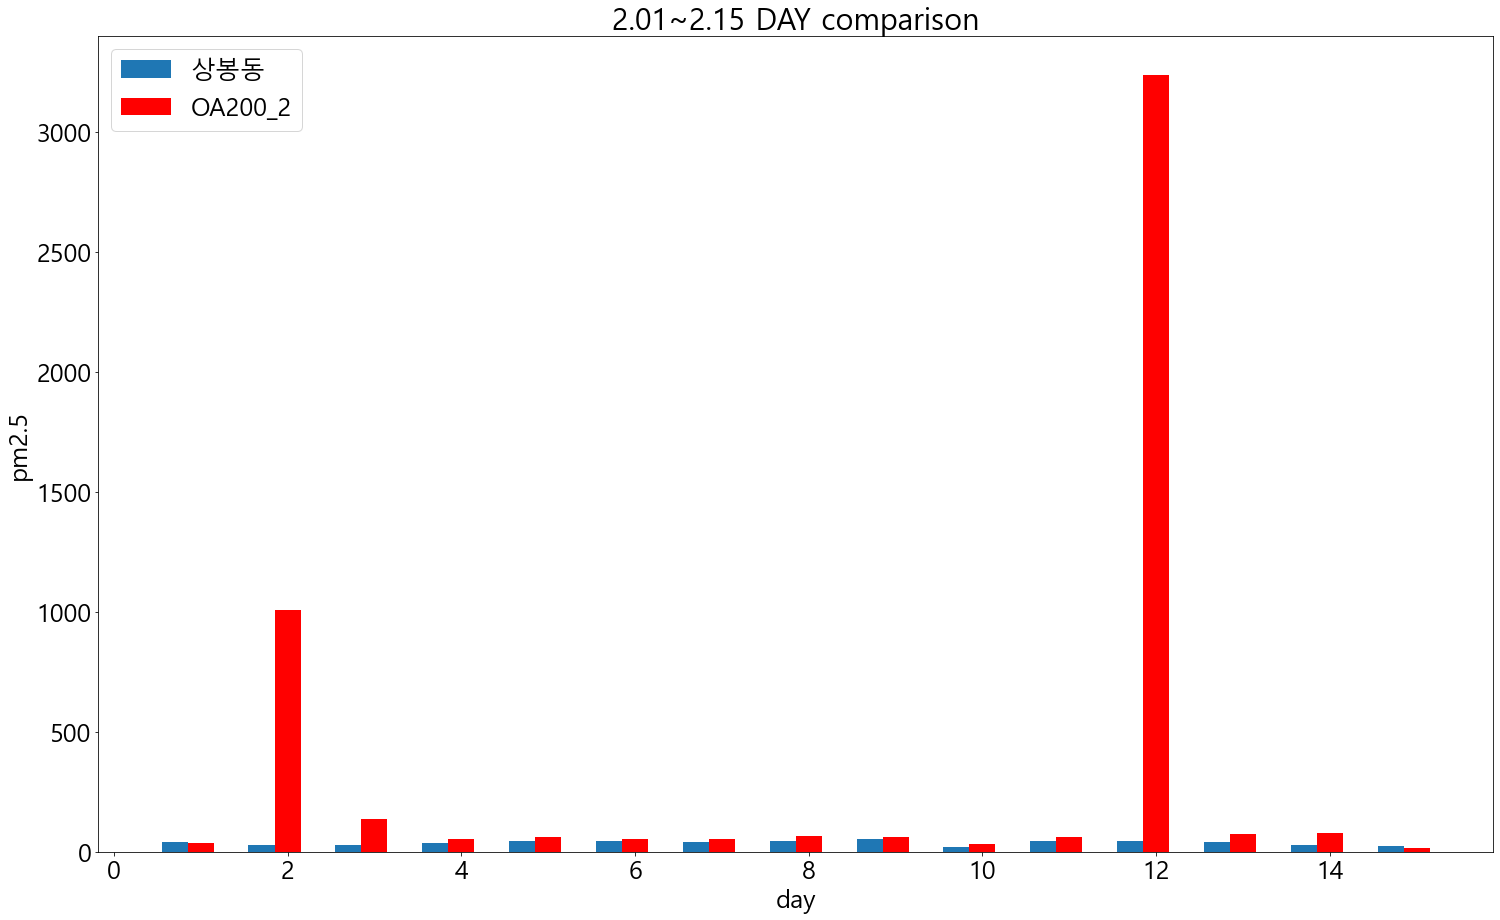

In [74]:
# arim_data 2.1~2.15 Day
arim_data = pd.read_csv('./OA200_2/OA2002_02.01~02.15.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data['day'] = arim_data.reg_date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
arim_data_avg = arim_data.groupby('day').mean()

# airKorea_data 2.1~2.15
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.01~02.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data['day'] = airKorea_data.date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
airKorea_data_avg = airKorea_data.groupby('day').mean()

# 그래프 2개 비교 ( 위는 선그래프, 아래는 막대 그래프 )
"""
plt.plot(airKorea_data.day, airKorea_data.pm25, arim_data.day, arim_data.pm25, 'r-')
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.1~1.15 DAY comparison')
plt.show()
"""

bar_width = 0.3
plt.bar(airKorea_data.day-bar_width, airKorea_data.pm25, label='상봉동', width=bar_width)
plt.bar(arim_data.day, arim_data.pm25, color='red', label='OA200_2', width=bar_width)
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend()
plt.title('2.01~2.15 DAY comparison')
plt.show()

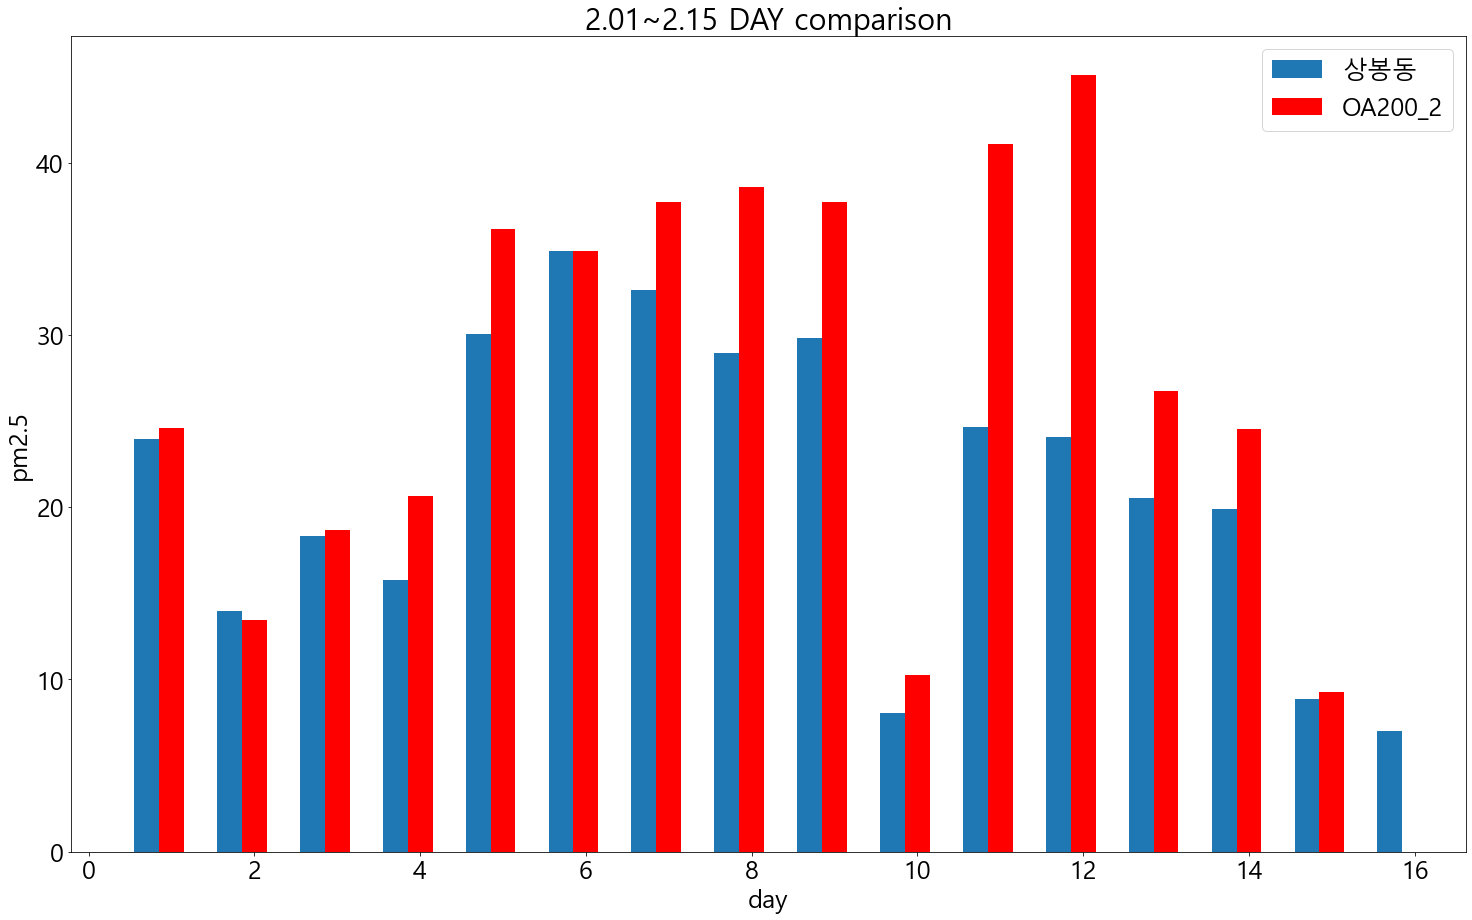

In [9]:
# arim_data 2.1~2.15 Day
arim_data = pd.read_csv('./OA200_2/OA2002_02.01~02.15.csv')

remove_out(arim_data, ['pm25'])

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data['day'] = arim_data.reg_date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
arim_data_avg = arim_data.groupby('day').mean()



# airKorea_data 2.1~2.15
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.01~02.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data['day'] = airKorea_data.date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
airKorea_data_avg = airKorea_data.groupby('day').mean()



# 그래프 2개 비교 ( 위는 선그래프, 아래는 막대 그래프 )
"""
plt.plot(airKorea_data.day, airKorea_data.pm25, arim_data.day, arim_data.pm25, 'r-')
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.1~1.15 DAY comparison')
plt.show()
"""

bar_width = 0.3
plt.bar(airKorea_data_avg.index-bar_width, airKorea_data_avg.pm25, label='상봉동', width=bar_width)
plt.bar(arim_data_avg.index, arim_data_avg.pm25, color='red', label='OA200_2', width=bar_width)
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend()
plt.title('2.01~2.15 DAY comparison')
plt.show()

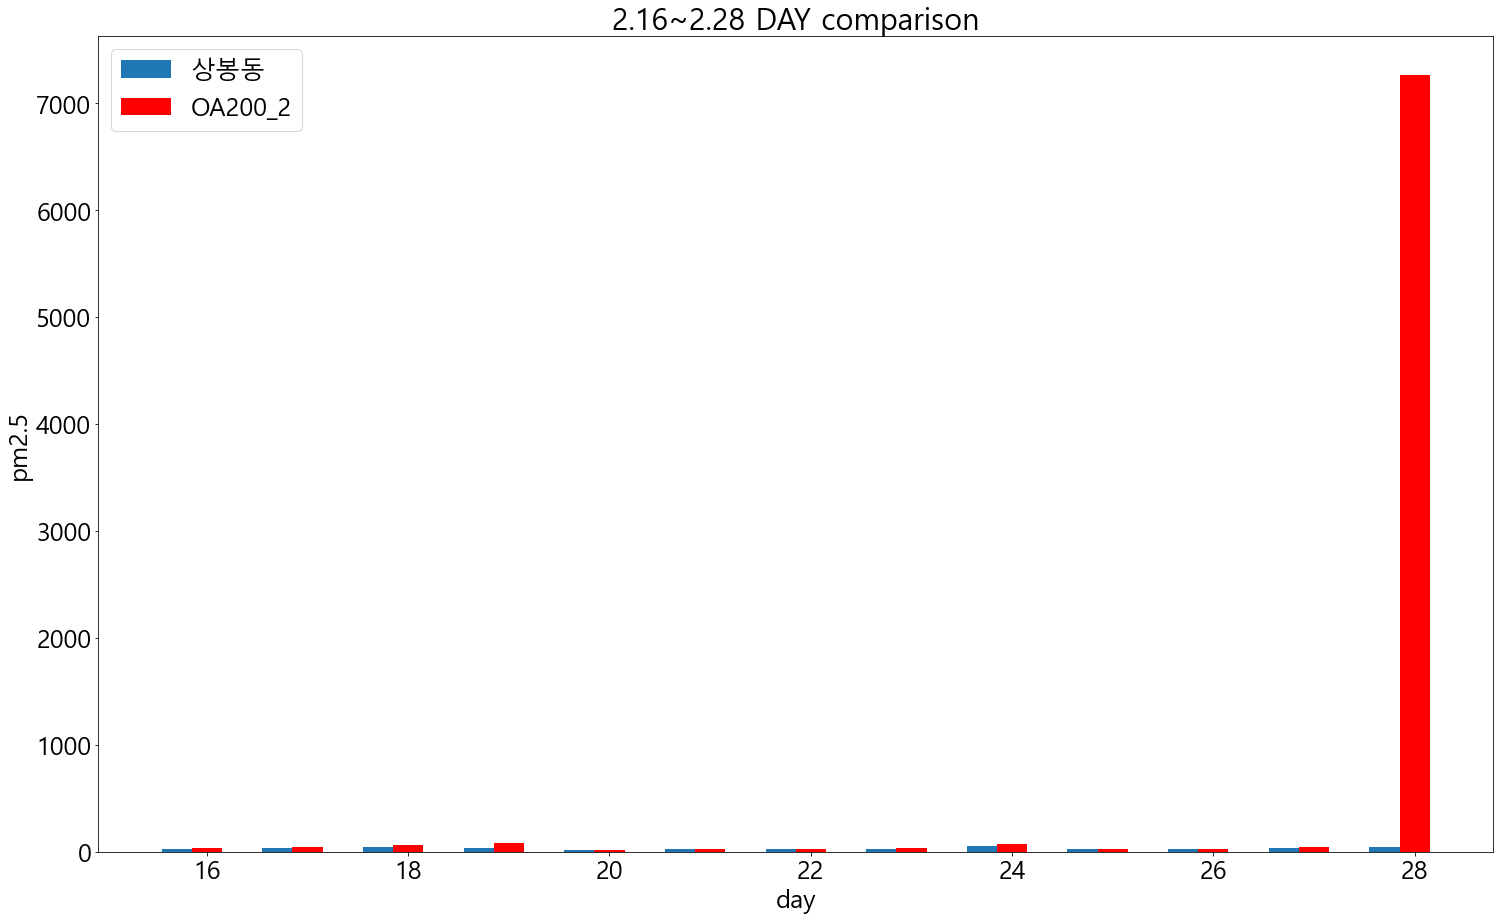

In [75]:
# arim_data 2.16~2.28 Day
arim_data = pd.read_csv('./OA200_2/OA2002_02.16~02.28.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data['day'] = arim_data.reg_date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
arim_data_avg = arim_data.groupby('day').mean()

# airKorea_data 2.16~2.28
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.16~02.28.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data['day'] = airKorea_data.date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
airKorea_data_avg = airKorea_data.groupby('day').mean()

# 그래프 2개 비교 ( 위는 선그래프, 아래는 막대 그래프 )
"""
plt.plot(airKorea_data.day, airKorea_data.pm25, arim_data.day, arim_data.pm25, 'r-')
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.1~1.15 DAY comparison')
plt.show()
"""

bar_width = 0.3
plt.bar(airKorea_data.day-bar_width, airKorea_data.pm25, label='상봉동', width=bar_width)
plt.bar(arim_data.day, arim_data.pm25, color='red', label='OA200_2', width=bar_width)
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend()
plt.title('2.16~2.28 DAY comparison')
plt.show()

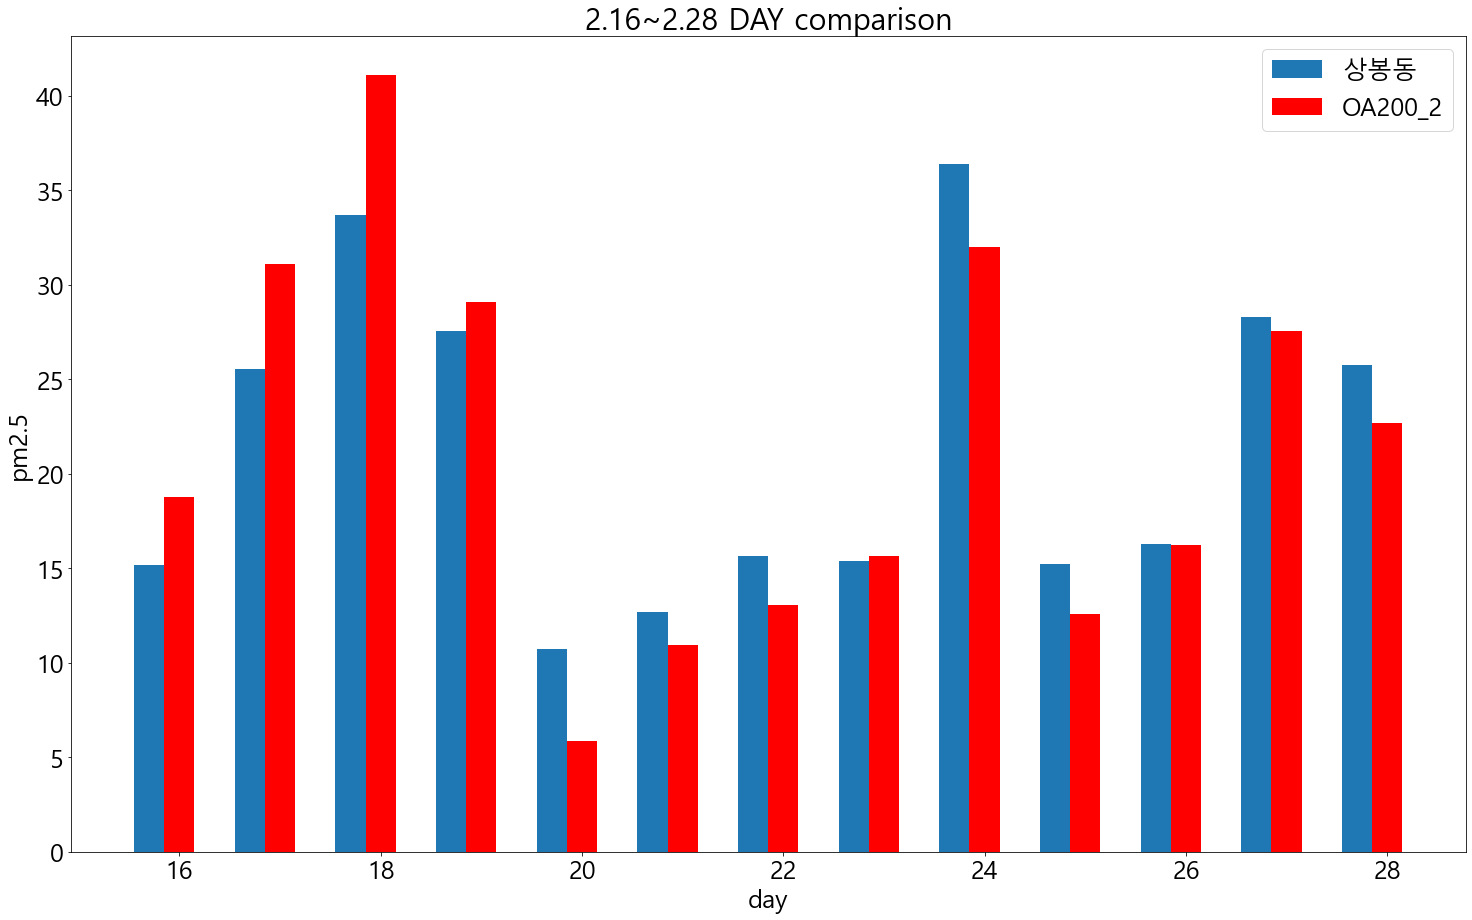

In [87]:
# arim_data 2.16~2.28 Day
arim_data = pd.read_csv('./OA200_2/OA2002_02.16~02.28.csv')

remove_out(arim_data, ['pm25'])

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data['day'] = arim_data.reg_date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
arim_data_avg = arim_data.groupby('day').mean()



# airKorea_data 2.16~2.28
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.16~02.28.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data['day'] = airKorea_data.date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
airKorea_data_avg = airKorea_data.groupby('day').mean()



# 그래프 2개 비교 ( 위는 선그래프, 아래는 막대 그래프 )
"""
plt.plot(airKorea_data.day, airKorea_data.pm25, arim_data.day, arim_data.pm25, 'r-')
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.1~1.15 DAY comparison')
plt.show()
"""

bar_width = 0.3
plt.bar(airKorea_data_avg.index-bar_width, airKorea_data_avg.pm25, label='상봉동', width=bar_width)
plt.bar(arim_data_avg.index, arim_data_avg.pm25, color='red', label='OA200_2', width=bar_width)
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend()
plt.title('2.16~2.28 DAY comparison')
plt.show()

# Data 비교 1월1일 ~ 2월 28일까지 Hour 기준

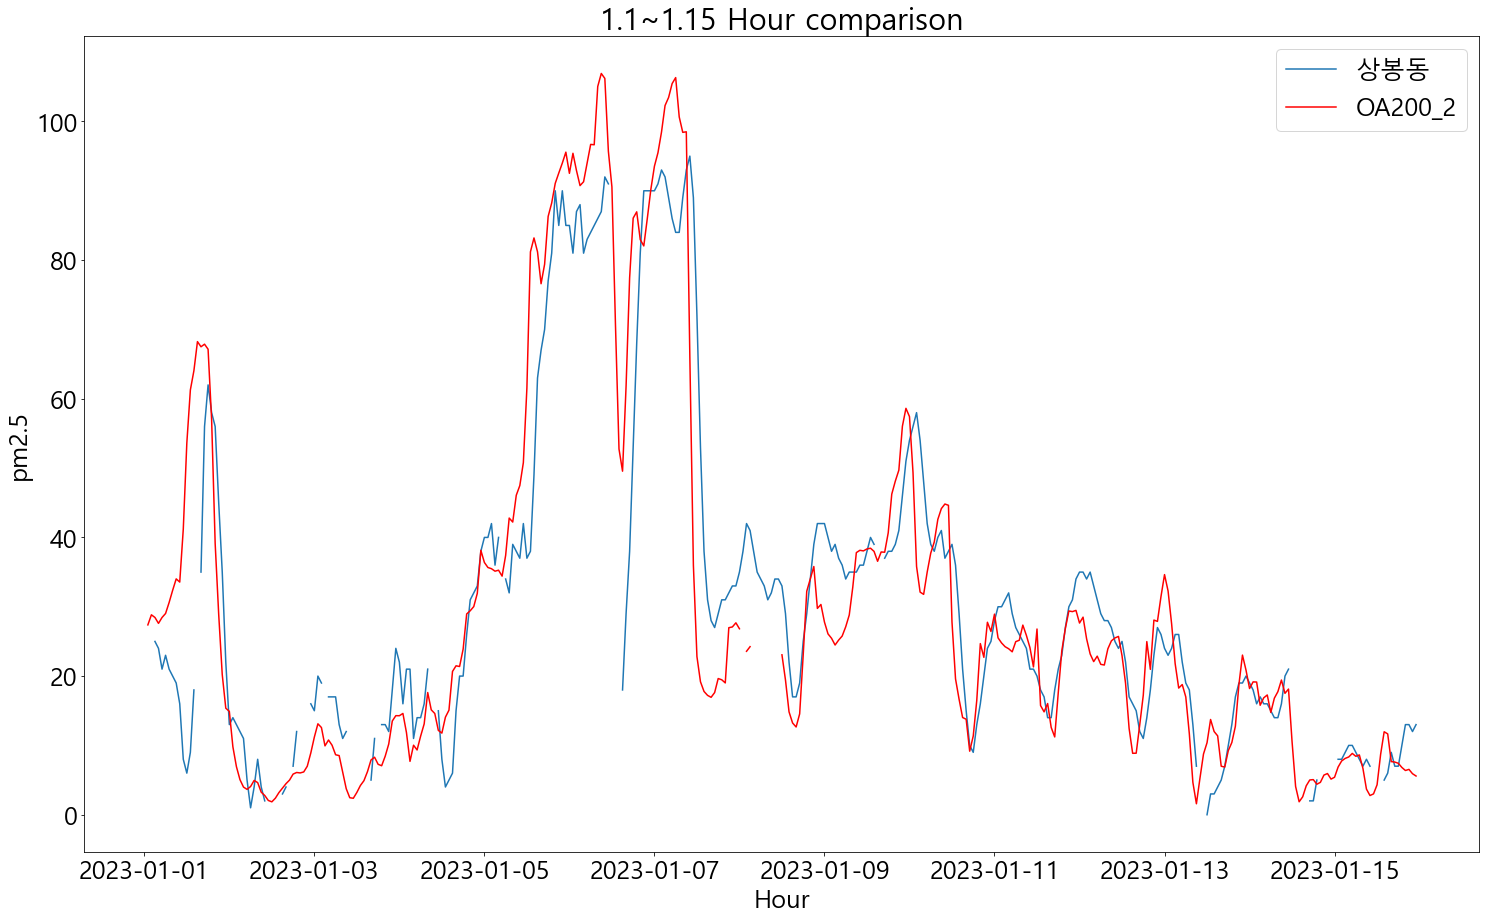

In [78]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data['hour'] = arim_data.reg_date.apply(lambda x : x.hour)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()


# 그래프 2개 비교
plt.plot(airKorea_data_avg.index, airKorea_data_avg.pm25, arim_data_avg.index, arim_data_avg.pm25, 'r-')
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.1~1.15 Hour comparison')
plt.show()

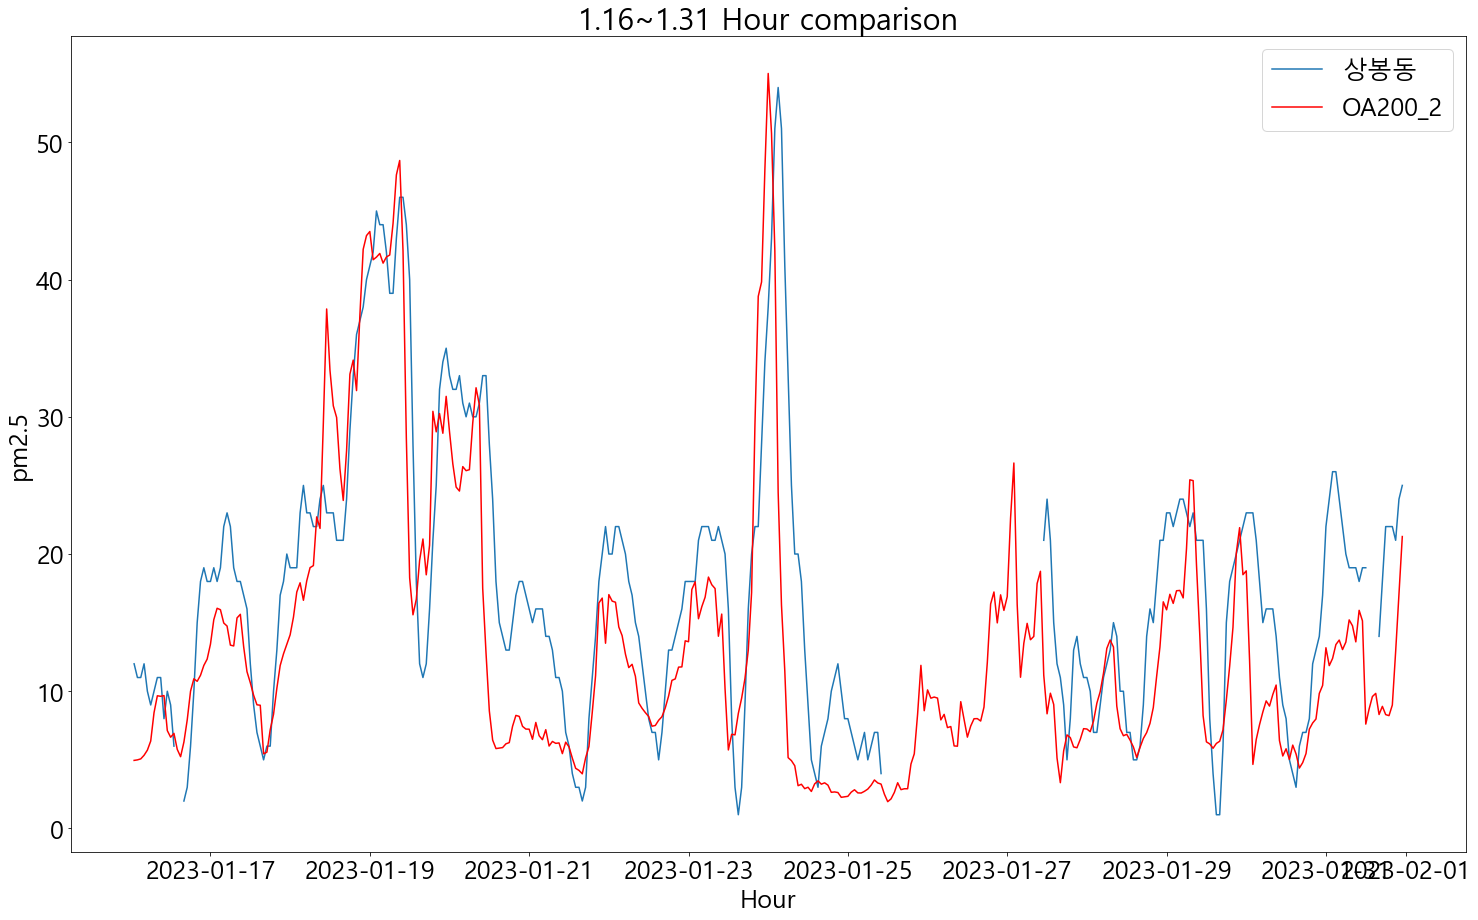

In [81]:
# arim_data 1.16~1.31 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.16~01.31.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.16~1.31 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.16~01.31.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# 그래프 2개 비교
plt.plot(airKorea_data_avg.index, airKorea_data_avg.pm25, arim_data_avg.index, arim_data_avg.pm25, 'r-')
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.16~1.31 Hour comparison')
plt.show()


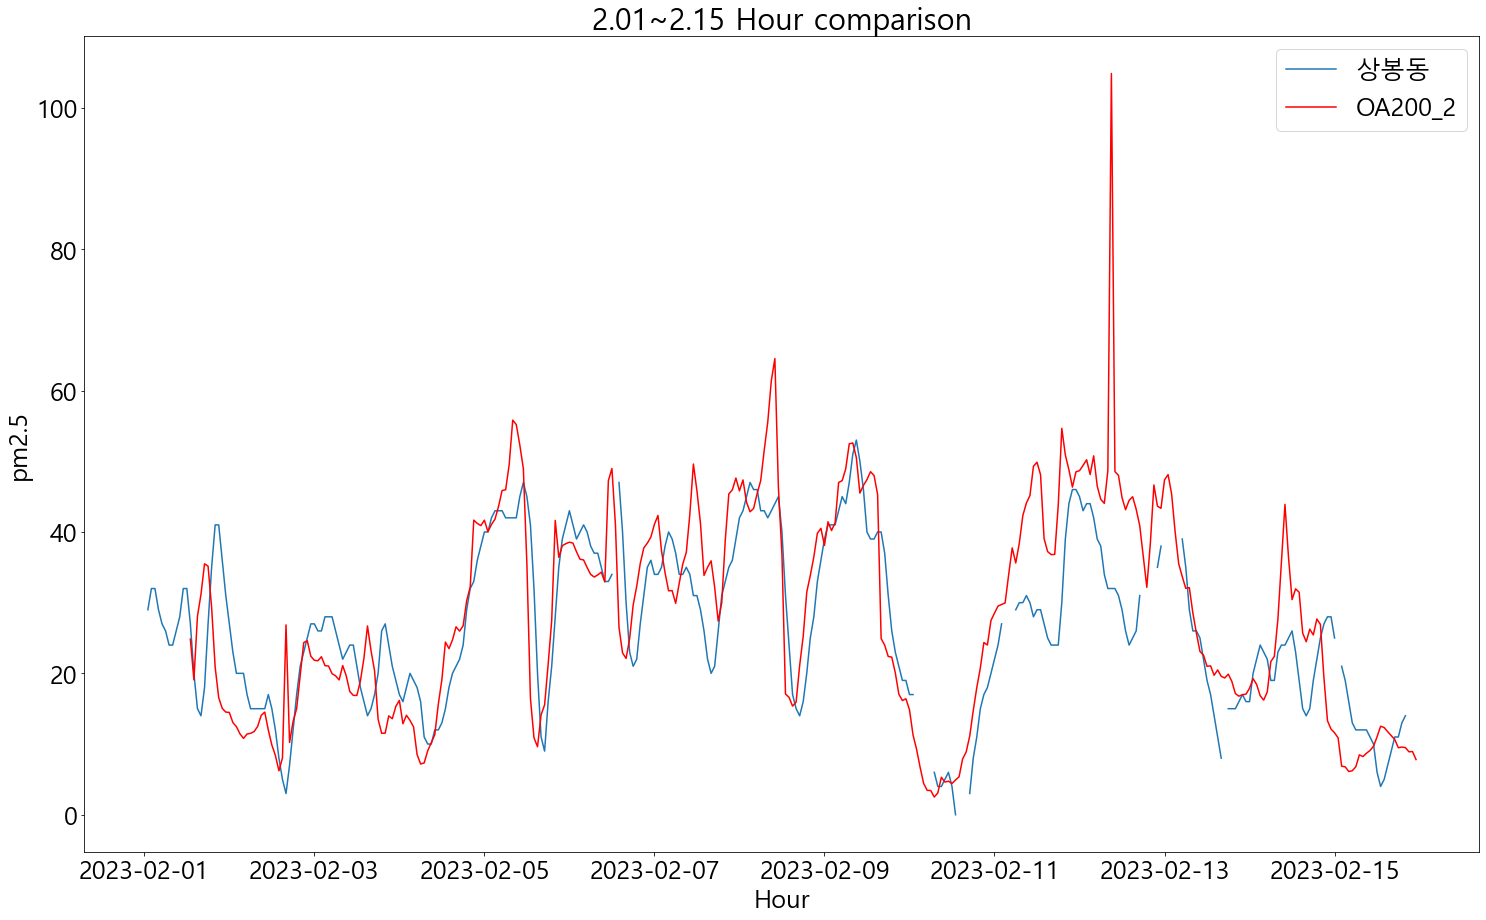

In [83]:
# arim_data 2.01~2.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_02.01~02.15.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 2.01~2.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.01~02.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()


# 그래프 2개 비교
plt.plot(airKorea_data_avg.index, airKorea_data_avg.pm25, arim_data_avg.index, arim_data_avg.pm25, 'r-')
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('2.01~2.15 Hour comparison')
plt.show()

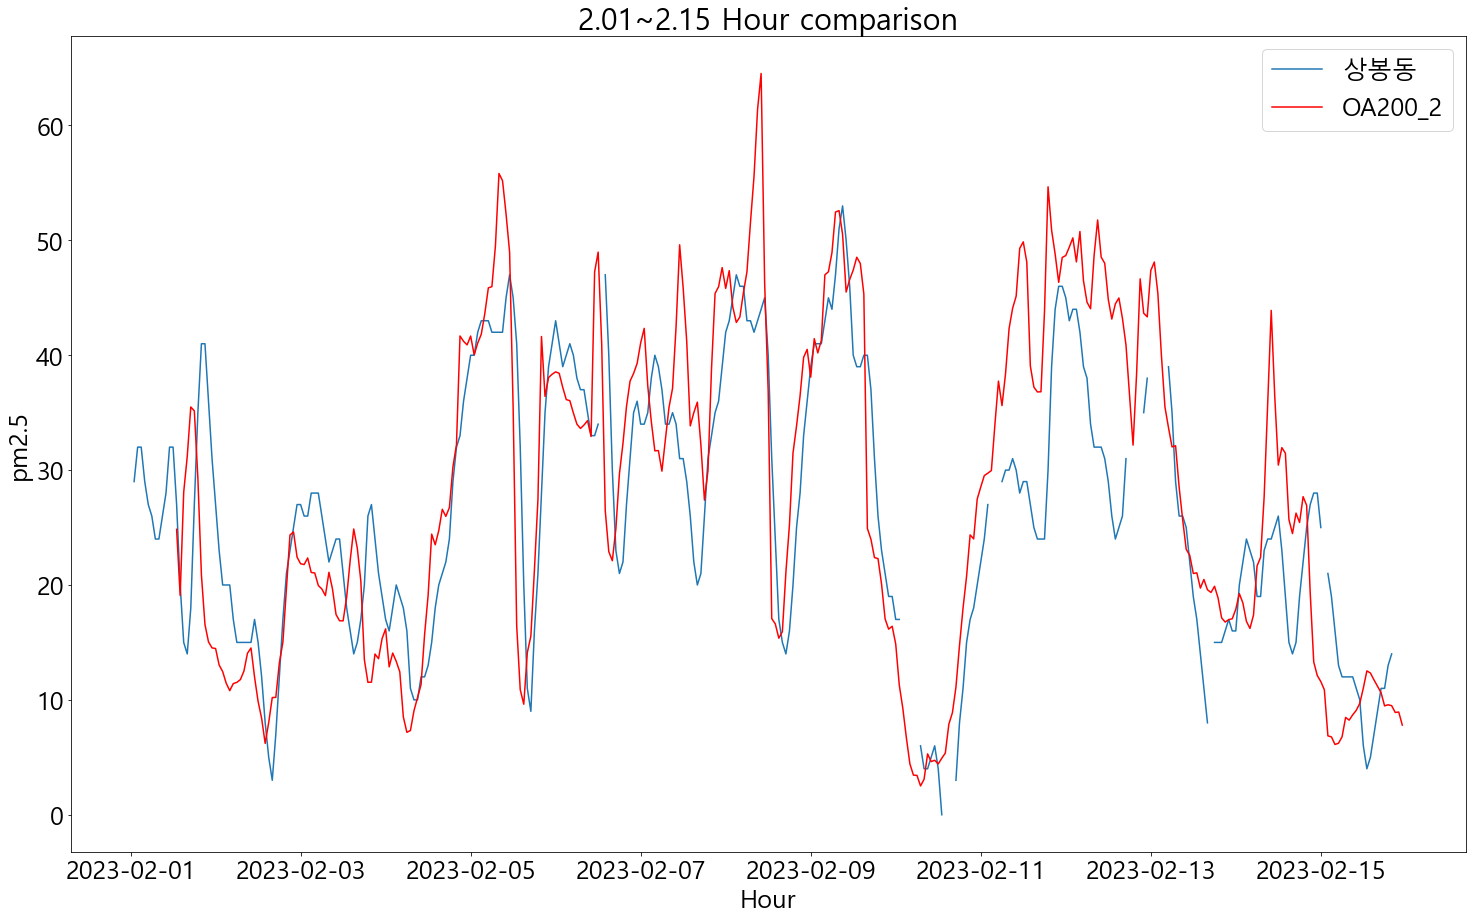

In [84]:
# arim_data 2.01~2.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_02.01~02.15.csv')

# 1번 함수 사용
remove_out(arim_data, ['pm25'])

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 2.01~2.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.01~02.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()


# 그래프 2개 비교
plt.plot(airKorea_data_avg.index, airKorea_data_avg.pm25, arim_data_avg.index, arim_data_avg.pm25, 'r-')
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('2.01~2.15 Hour comparison')
plt.show()

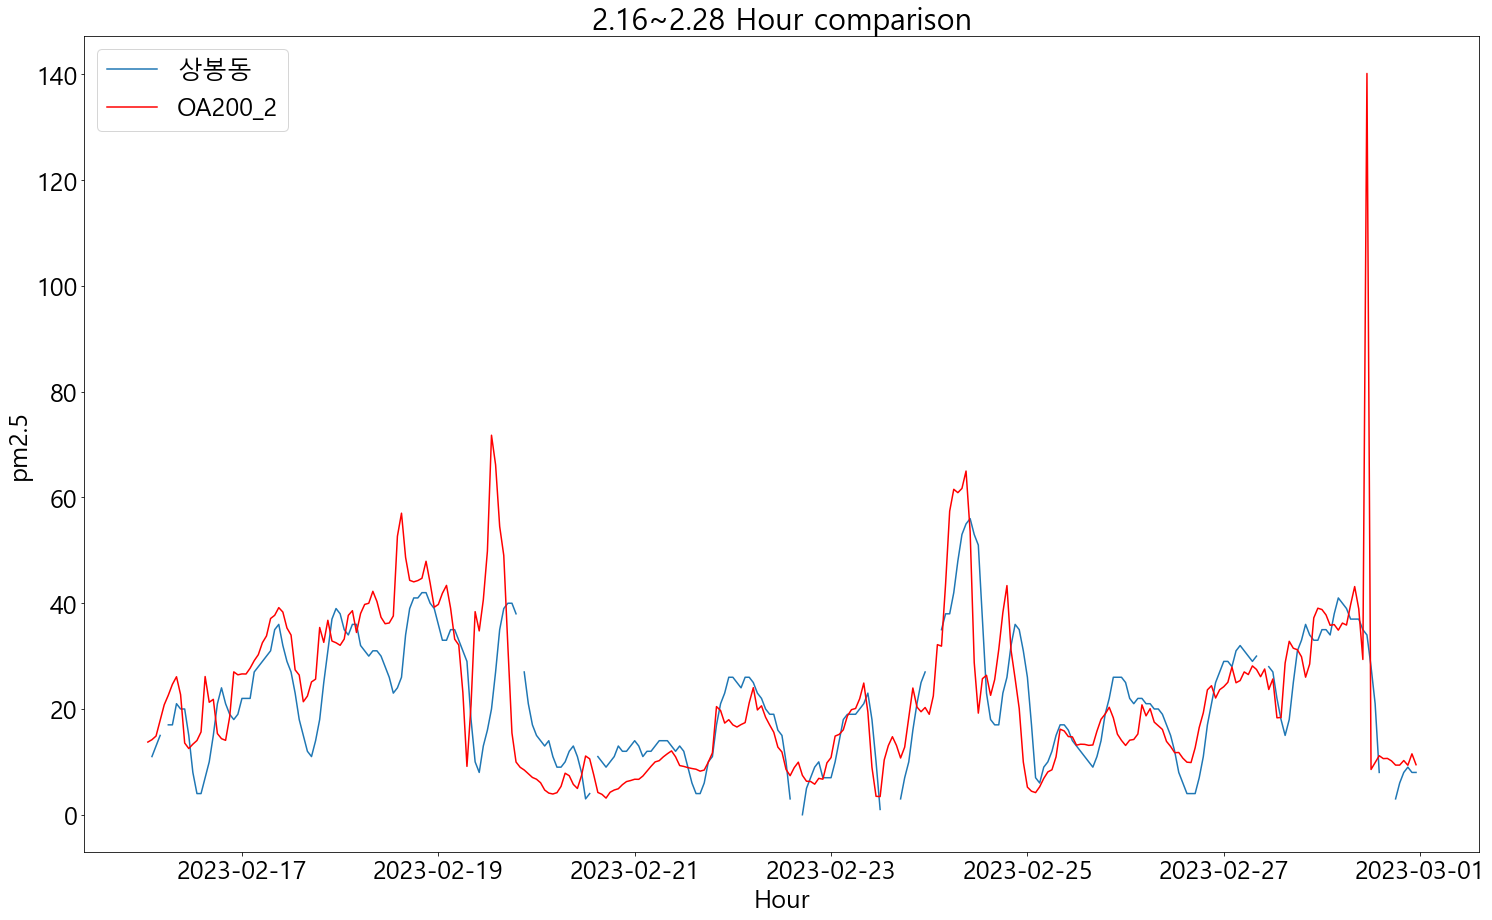

In [85]:
# arim_data 2.16~2.28 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_02.16~02.28.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 2.16~2.28 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.16~02.28.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# 그래프 2개 비교
plt.plot(airKorea_data_avg.index, airKorea_data_avg.pm25, arim_data_avg.index, arim_data_avg.pm25, 'r-')
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('2.16~2.28 Hour comparison')
plt.show()

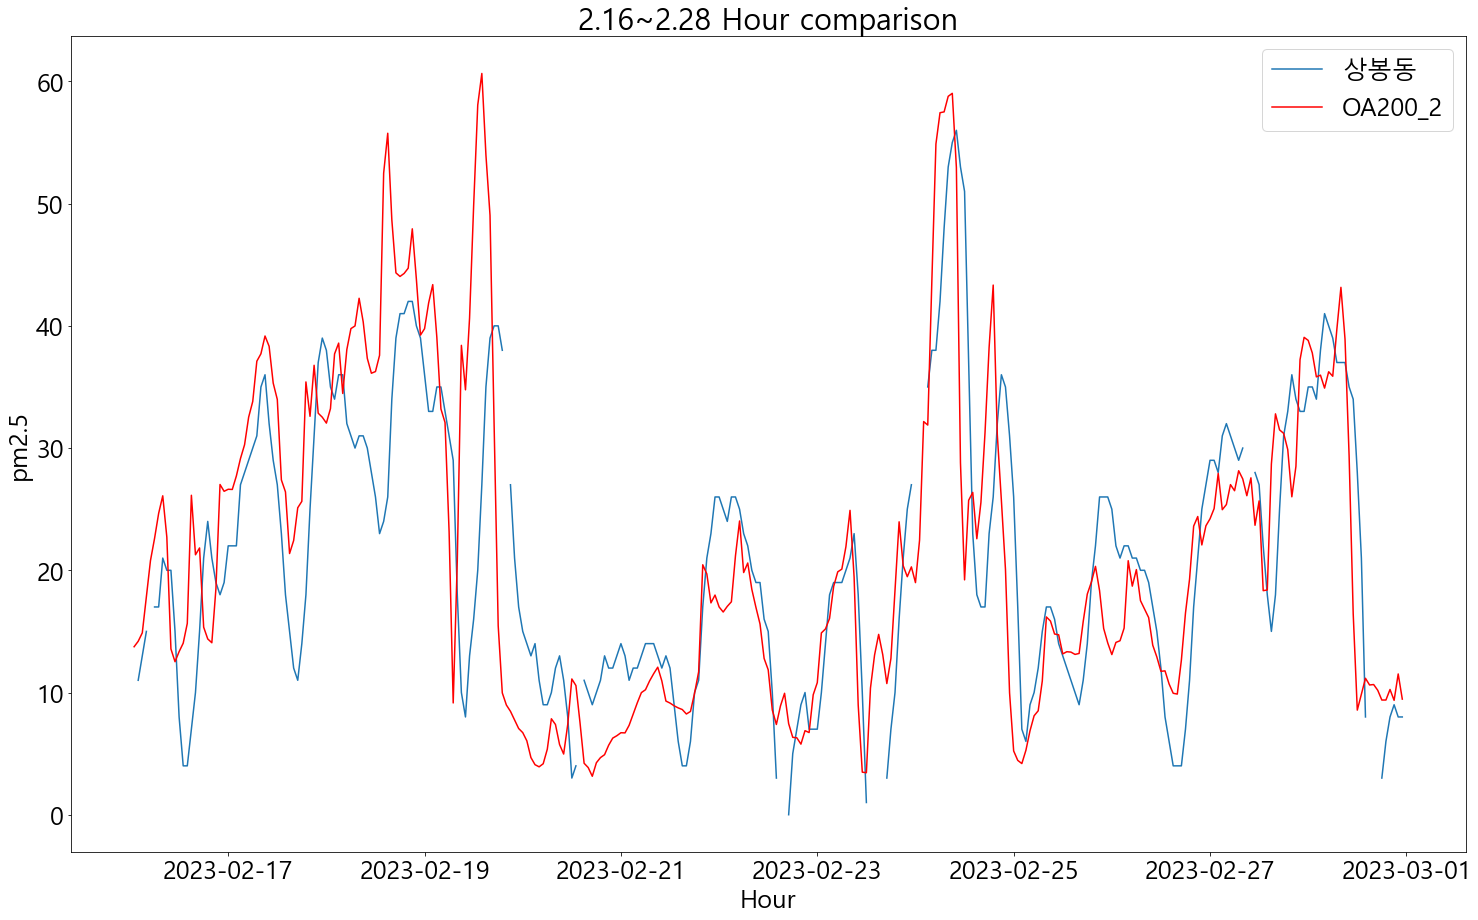

In [91]:
# arim_data 2.16~2.28 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_02.16~02.28.csv')

# 1번 함수 사용
remove_out(arim_data, ['pm25'])

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

# airKorea data 2.16~2.28 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.16~02.28.csv')
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# 그래프 2개 비교
plt.plot(airKorea_data_avg.index, airKorea_data_avg.pm25, arim_data_avg.index, arim_data_avg.pm25, 'r-')
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('2.16~2.28 Hour comparison')
plt.show()